In [1]:
import os

# Path to clusTCR repo goes here:
os.chdir('/home/sebastiaan/PhD/Repositories/clusTCR/')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from clustcr import Clustering, datasets

In [3]:
plt.style.use(['seaborn-white', 'seaborn-paper'])
plt.rc('font', family='serif')
sns.set_palette('Set1')
sns.set_context('paper', font_scale=1.3)

In [19]:
def autolabel_1(rects, label):
    for idx,rect in enumerate(rects):
        height = rect.get_height()
        ax1.text(rect.get_x() + rect.get_width() - .1, .5*height,
                label, ha='center', va='bottom', rotation=0, weight='bold')
        
def autolabel_2(rects, label):
    for idx,rect in enumerate(rects):
        height = rect.get_height()
        ax2.text(rect.get_x() + rect.get_width() - .1, .5*height,
                label, ha='center', va='bottom', rotation=0, weight='bold')

/home/sebastiaan/PhD/Repositories/clusTCR/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)
/home/sebastiaan/PhD/Repositories/clusTCR/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will

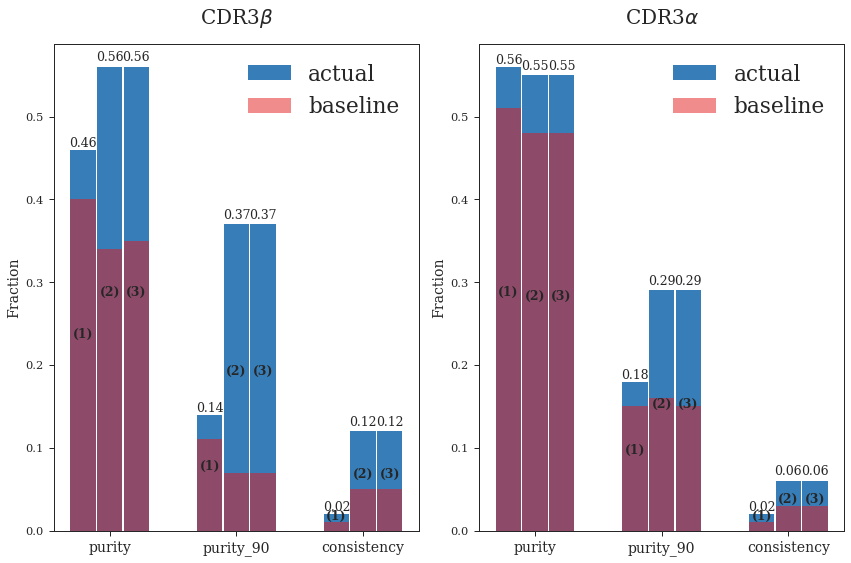

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,8))

xlabels = ['purity', 'purity_90', 'consistency']
x = np.arange(len(xlabels))  # the label locations
width = 0.2  # the width of the bars

col1 = sns.color_palette("Set1")[0]
col2 = sns.color_palette("Set1")[1]

### BETA

# Data
beta_seq = datasets.vdjdb_beta()
beta_epi = datasets.vdjdb_beta(epitopes=True)

# Clustering
ts_out = Clustering().fit(beta_seq)
mcl_out = Clustering(method='mcl').fit(beta_seq)
faiss_out = Clustering(method='faiss', faiss_cluster_size=6).fit(beta_seq)

ts_metrics = ts_out.metrics(beta_epi)
mcl_metrics = mcl_out.metrics(beta_epi)
faiss_metrics = faiss_out.metrics(beta_epi)

ts = ts_metrics.summary()
mcl = mcl_metrics.summary()
faiss = faiss_metrics.summary()

# Plotting
faiss_actual = ax1.bar(x - width - .01, np.round(faiss.actual[1:],2), width, color=col2)
faiss_permuted = ax1.bar(x - width - .01, np.round(faiss.baseline[1:],2), width, color=col1, alpha=.5)

mcl_actual = ax1.bar(x, np.round(mcl.actual[1:],2), width, color=col2)
mcl_permuted = ax1.bar(x, np.round(mcl.baseline[1:],2), width, color=col1, alpha=.5)

ts_actual = ax1.bar(x + width + .01, np.round(ts.actual[1:],2), width, label='actual', color=col2)
ts_permuted = ax1.bar(x + width + .01, np.round(ts.baseline[1:],2), width, label='baseline', color=col1, alpha=.5)

autolabel_1(faiss_actual, f'(1)')
autolabel_1(mcl_actual, f'(2)')
autolabel_1(ts_actual, f'(3)')

ax1.set_ylabel('Fraction', fontsize=14)
ax1.set_title(r'CDR3$\beta$', fontsize=20, pad=20)
ax1.set_xticks(x)
ax1.set_xticklabels(xlabels, fontsize=14)

ax1.bar_label(ts_actual, padding=3)
ax1.bar_label(mcl_actual, padding=3)
ax1.bar_label(faiss_actual)

ax1.legend(fontsize='xx-large')


### ALPHA

# Data
alpha_seq = datasets.vdjdb_alpha()
alpha_epi = datasets.vdjdb_alpha(epitopes=True)

# Clustering
ts_out = Clustering().fit(alpha_seq)
mcl_out = Clustering(method='mcl').fit(alpha_seq)
faiss_out = Clustering(method='faiss', faiss_cluster_size=6).fit(alpha_seq)

ts_metrics = ts_out.metrics(alpha_epi)
mcl_metrics = mcl_out.metrics(alpha_epi)
faiss_metrics = faiss_out.metrics(alpha_epi)

ts = ts_metrics.summary()
mcl = mcl_metrics.summary()
faiss = faiss_metrics.summary()

# Plotting
faiss_actual = ax2.bar(x - width - .01, np.round(faiss.actual[1:],2), width, color=col2)
faiss_permuted = ax2.bar(x - width - .01, np.round(faiss.baseline[1:],2), width, color=col1, alpha=.5)

mcl_actual = ax2.bar(x, np.round(mcl.actual[1:],2), width, color=col2)
mcl_permuted = ax2.bar(x, np.round(mcl.baseline[1:],2), width, color=col1, alpha=.5)

ts_actual = ax2.bar(x + width + .01, np.round(ts.actual[1:],2), width, label='actual', color=col2)
ts_permuted = ax2.bar(x + width + .01, np.round(ts.baseline[1:],2), width, label='baseline', color=col1, alpha=.5)

autolabel_2(faiss_actual, f'(1)')
autolabel_2(mcl_actual, f'(2)')
autolabel_2(ts_actual, f'(3)')

ax2.set_ylabel('Fraction', fontsize=14)
ax2.set_title(r'CDR3$\alpha$', fontsize=20, pad=20)
ax2.set_xticks(x)
ax2.set_xticklabels(xlabels, fontsize=14)

ax2.bar_label(ts_actual, padding=3)
ax2.bar_label(mcl_actual, padding=3)
ax2.bar_label(faiss_actual)

ax2.legend(fontsize='xx-large')

fig.tight_layout()
fig.savefig('results/figures/faiss_preclustering.eps', format='eps', bbox_inches='tight')

In [111]:
ts

,actual,baseline,metrics
0,0.506289,0.506289,retention
1,0.552904,0.477677,purity
2,0.294712,0.132970,purity_90
3,0.061071,0.028221,consistency


In [76]:
alpha_seq = datasets.vdjdb_alpha()
alpha_epi = datasets.vdjdb_alpha(epitopes=True)

ts_out = Clustering().fit(alpha_seq)
mcl_out = Clustering(method='mcl').fit(alpha_seq)

ts_metrics = ts_out.metrics(alpha_epi)
mcl_metrics = mcl_out.metrics(alpha_epi)

ts = ts_metrics.summary()
mcl = mcl_metrics.summary()

/home/sebastiaan/PhD/Repositories/clusTCR/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


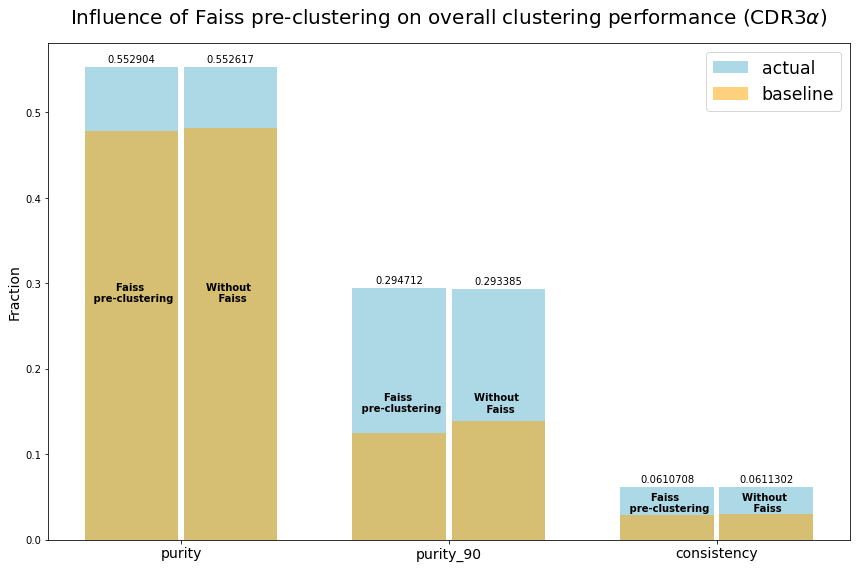

In [77]:
fig, ax = plt.subplots(figsize=(12,8))

xlabels = ['purity', 'purity_90', 'consistency']
x = np.arange(len(xlabels))  # the label locations
width = 0.35  # the width of the bars

ts_actual = ax.bar(x - width/2 - .01, ts.actual[1:], width, label='actual', color=col2)
ts_permuted = ax.bar(x - width/2 - .01, ts.baseline[1:], width, label='baseline', color=col1, alpha=.5)

mcl_actual = ax.bar(x + width/2 + .01, mcl.actual[1:], width, color=col2)
mcl_permuted = ax.bar(x + width/2 + .01, mcl.baseline[1:], width, color=col1, alpha=.5)

autolabel(ts_actual, f'Faiss \n pre-clustering')
autolabel(mcl_actual, f'Without \n Faiss')

ax.set_ylabel('Fraction', fontsize=14)
ax.set_title(r'Influence of Faiss pre-clustering on overall clustering performance (CDR3$\alpha$)', fontsize=20, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(xlabels, fontsize=14)

ax.bar_label(ts_actual, padding=3)
ax.bar_label(mcl_actual, padding=3)


ax.legend(fontsize='xx-large')

fig.tight_layout()
fig.savefig('results/figures/faiss_preclustering_alpha.eps', format='eps', bbox_inches='tight')